In [17]:
from collections import Counter
from konlpy.tag import Okt
import pytagcloud
import jpype
import datetime
from konlpy.tag import Mecab
import numpy as np
import matplotlib.font_manager as fm
from konlpy.tag import Twitter
from gensim.models import word2vec
path = 'BMJUA.ttf'
fontprop = fm.FontProperties(fname = path, size=18)
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib
from matplotlib import style
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sb

In [3]:
df = pd.read_csv("review.csv")

In [4]:
df['date'] = df['date'].str.replace("년 ","-")
df['date'] = df['date'].str.replace("월 ","-")
df['date'] = df['date'].str.replace("일 "," ")
df['date'] = df['date'].str.split(" ",expand=True)
df['date'] =pd.to_datetime(df['date'])
df['weekday']=df['date'].dt.weekday

In [5]:
df

,업체명,카테고리,메뉴,맛,양,배달,리뷰,date,weekday
0,전주석쇠불고기-본점,한식,파절이매콤통삼겹（2~3인）（공기밥2＋김치찌개＋밑반찬＋쌈）/1,5.0,5.0,5.0,자주시켜먹는 단골집인데 항상변치않고 맛있습니다! !!,2017-12-06,2
1,전주석쇠불고기-본점,한식,통삼겹살 2人（고기＋공기밥2＋김치찌개＋쌈＋밑반찬）/1(추가 선택(고기 추가)),5.0,5.0,5.0,배달 시간도 오래걸리지 않고 양이 적을거 같아서 고기 추가를 했는데..안해도 됐었네...,2017-09-30,5
2,전주석쇠불고기-본점,한식,통삼겹（小／500g）（냉열무국수 or 냉열무우동 or 비빔열무국수＋쌈）/1(메뉴 선...,5.0,5.0,5.0,배달도빠르고맛나요ㅁ,2018-03-13,1
3,전주석쇠불고기-본점,한식,통삼겹（3~4인）（김치찌개＋공기밥3＋밑반찬＋쌈）/1,5.0,5.0,5.0,찌개와 통삼겹 맛있는 5찬. 많이 먹는편이라 3인분짜리 주문했는데... 배터지는줄 ...,2018-02-27,1
4,전주석쇠불고기-본점,한식,통삼겹（1~2인）（공기밥1＋김치찌개＋밑반찬＋쌈）/1(추가 선택(비빔냉면 추가)),3.0,3.0,5.0,일인분같지않은양.. 냉면안시켰음배고팠을뻔 편마늘좀마니달라했는데 그대로..,2017-10-28,5
...,...,...,...,...,...,...,...,...,...
12813,동강,중식,1세트（탕수육＋짜장2）/1(식사선택1(볶음밥（보통）)식사선택2(짜장（곱빼기）)),1.0,3.0,3.0,맛없었어요 탕수육돼지비린내 나고 ㅠ 실패,2017-11-11,5
12814,동강,중식,1세트（탕수육＋짜장2）/1(식사선택1(볶음밥（보통）)식사선택2(볶음밥（보통）)),4.0,4.0,5.0,배달이 빨라서 좋네요~,2018-01-18,3
12815,동강,중식,1세트（탕수육＋짜장2）/1(식사선택1(볶음밥（곱빼기）)식사선택2(볶음밥（보통）)),3.0,4.0,3.0,짜장면 그릇가져가주세요,2018-05-25,4
12816,동강,중식,1세트（탕수육＋짜장2）/1(식사선택1(볶음밥（곱빼기）)식사선택2(볶음밥（보통）)),5.0,5.0,5.0,언제나 너무 맛잇게 먹고있어요 ㅎㅎ,2017-10-07,5


In [6]:
df['total'] = df['맛'] +df['양'] + df['배달']

In [7]:
df.corr()

,맛,양,배달,weekday,total
맛,1.000000,0.710630,0.593045,-0.001324,0.880009
양,0.710630,1.000000,0.624657,-0.000188,0.888228
배달,0.593045,0.624657,1.000000,-0.003422,0.850197
weekday,-0.001324,-0.000188,-0.003422,1.000000,-0.001915
total,0.880009,0.888228,0.850197,-0.001915,1.000000


In [8]:
df1 = df.groupby("업체명").mean()
df1

,맛,양,배달,weekday,total
업체명,,,,,
BHC-성수역점,4.402516,4.452830,4.320755,3.345912,13.176101
BHC-성수점,4.592437,4.546218,4.554622,2.970588,13.693277
BHC-자양행복점,4.368585,4.371695,4.222395,3.063764,12.962675
BHC-중곡대박점,4.705486,4.712223,4.728585,3.067372,14.146295
BHC-중곡점,4.587629,4.615979,4.747423,3.293814,13.951031
HONEY쇼우가족발,4.424460,4.374101,4.539568,3.467626,13.338129
LA돈까스,4.436464,4.607735,4.613260,3.353591,13.657459
굽네치킨-화양점,4.628505,4.525701,4.635514,3.177570,13.789720
놀부옛날통닭-군자점,4.331641,4.316413,4.262267,3.519459,12.910321


In [9]:
df2 = df.groupby("weekday").mean()
df2

,맛,양,배달,total
weekday,,,,
0,4.451220,4.476252,4.482028,13.409499
1,4.487052,4.505785,4.489256,13.482094
2,4.464839,4.482718,4.513707,13.461263
3,4.528877,4.527579,4.543154,13.599611
4,4.500935,4.506542,4.514019,13.521495
5,4.480967,4.499328,4.480519,13.460815
6,4.451005,4.479899,4.482831,13.413735


In [10]:
df3 = df.groupby("카테고리").mean()
df3

,맛,양,배달,weekday,total
카테고리,,,,,
분식,4.514107,4.541536,4.554075,3.224922,13.609718
야식,4.429213,4.196629,4.369663,3.192135,12.995506
일식/돈까스,4.436464,4.607735,4.613260,3.353591,13.657459
족발/보쌈,4.658635,4.622992,4.642570,3.391064,13.924197
중식,4.063419,4.248162,4.329044,3.259191,12.640625
치킨,4.529146,4.528670,4.509160,3.205805,13.566976
피자,4.495772,4.566487,4.531130,3.415065,13.593390
한식,4.408055,4.482777,4.409645,3.140435,13.300477


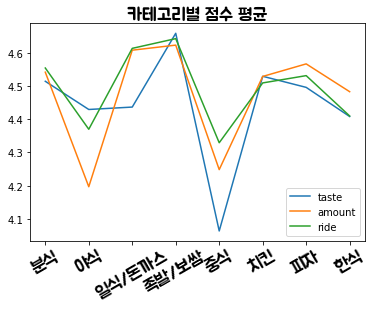

In [11]:
plt.plot(df.groupby("카테고리").mean()['맛'],label='taste')
plt.plot(df.groupby("카테고리").mean()['양'],label='amount')
plt.plot(df.groupby("카테고리").mean()['배달'],label='ride')
plt.legend(loc='lower right')
plt.xticks(np.arange(8),['분식','야식','일식/돈까스','족발/보쌈','중식','치킨','피자','한식'], fontproperties=fontprop,rotation=30)
plt.title("카테고리별 점수 평균", fontproperties=fontprop)
plt.show()

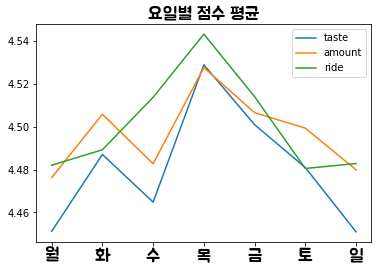

In [12]:
plt.plot(df.groupby("weekday").mean()['맛'],label='taste')
plt.plot(df.groupby("weekday").mean()['양'],label='amount')
plt.plot(df.groupby("weekday").mean()['배달'],label='ride')
plt.legend()
plt.xticks(np.arange(7),['월','화','수','목','금','토','일'], fontproperties=fontprop)
plt.title("요일별 점수 평균", fontproperties=fontprop)
plt.show()

In [13]:
df.groupby("weekday").count()
#0:월 1:화 2:수 3:목 4:금 5:토 6:일

,업체명,카테고리,메뉴,맛,양,배달,리뷰,date,total
weekday,,,,,,,,,
0,1558,1558,1558,1558,1558,1558,1558,1558,1558
1,1815,1815,1815,1815,1815,1815,1815,1815,1815
2,1678,1678,1678,1678,1678,1678,1678,1678,1678
3,1541,1541,1541,1541,1541,1541,1541,1541,1541
4,1605,1605,1605,1605,1605,1605,1605,1605,1605
5,2233,2233,2233,2233,2233,2233,2233,2233,2233
6,2388,2388,2388,2388,2388,2388,2388,2388,2388


In [14]:
df.date.describe()
df['month'] = df.date.dt.month
df.groupby("month").mean()

,맛,양,배달,weekday,total
month,,,,,
1,4.447475,4.450000,4.446465,3.041919,13.343939
2,4.470588,4.486631,4.479947,3.196524,13.437166
3,4.493299,4.492023,4.520102,3.386088,13.505424
4,4.562539,4.589297,4.551960,3.410703,13.703796
5,4.507657,4.536753,4.522971,3.251914,13.567381
9,4.392265,4.486188,4.558011,3.082873,13.436464
10,4.422688,4.481740,4.535354,3.182595,13.439782
11,4.481781,4.508772,4.514845,3.201080,13.505398
12,4.459205,4.448222,4.444038,3.383891,13.351464


In [15]:
pd.DataFrame(df['리뷰']).to_csv('review_data.csv', mode = 'w', index = True, encoding = 'utf-8-sig')

In [16]:
f=open('review_data.csv',encoding='utf-8-sig')

data=f.read()
nlp = Okt()
nouns = nlp.nouns(data)
nouns = [n for n in nouns if len(n) > 1]
print('done')

count = Counter(nouns)
tag2 = count.most_common(1000)

print(tag2)
get=[]


for k in range(len(tag2)):

    if tag2[k][0]== "사람" : 
        get+=[k]
    if tag2[k][0]== "그냥" : 
        get+=[k]
    if tag2[k][0]== "남자" : 
        get+=[k]
    if tag2[k][0]== "여자" : 
        get+=[k]            

get.reverse()

for z in get:
    del tag2[z]
all_= pd.DataFrame(count.most_common(100))
all_.to_csv('word.csv',encoding='utf-8-sig')
taglist = pytagcloud.make_tags(tag2, maxsize=100)
pytagcloud.create_tag_image(taglist,'review_word.jpg', size=(900, 600), fontname = 'Noto Sans CJK', rectangular= False)

done
[('배달', 3130), ('양도', 1005), ('족발', 892), ('항상', 839), ('진짜', 817), ('치킨', 725), ('정말', 703), ('주문', 700), ('여기', 511), ('다음', 472), ('역시', 464), ('막국수', 445), ('리뷰', 428), ('최고', 426), ('튀김', 423), ('처음', 418), ('소스', 416), ('시간', 414), ('조금', 413), ('자주', 408), ('피자', 407), ('서비스', 381), ('떡볶이', 369), ('생각', 349), ('오늘', 344), ('양념', 307), ('가격', 289), ('완전', 256), ('고기', 254), ('음식', 251), ('그냥', 246), ('닭발', 221), ('치즈', 219), ('양은', 213), ('먹기', 208), ('보쌈', 204), ('정도', 201), ('사진', 200), ('추천', 196), ('별로', 184), ('바삭', 184), ('대박', 176), ('메뉴', 173), ('이번', 169), ('추가', 166), ('번창', 162), ('주먹밥', 160), ('아주', 158), ('포장', 154), ('국물', 153), ('하나', 151), ('후라이드', 151), ('사장', 150), ('도야', 147), ('탕수육', 145), ('매번', 142), ('요청', 140), ('다른', 136), ('마늘', 134), ('제일', 134), ('냄새', 134), ('가성', 133), ('매콤', 131), ('김치', 131), ('샐러드', 131), ('달라', 127), ('보통', 124), ('만족', 124), ('혼자', 123), ('짬뽕', 123), ('느낌', 122), ('존맛', 121), ('살짝', 118), ('주시', 114), ('인분', 112), ('보고', 10

In [ ]:
n = 0
taglist = pytagcloud.make_tags(tag2[:300], maxsize = 60)
pytagcloud.create_tag_image(taglist, str(n)+'.jpg', size = (400, 300), fontname = 'Noto Sans CJK', rectangular = False)
n += 1

fp = open("review_data.csv","r",encoding="utf-8")
text = fp.readlines()
fp.close()

### 텍스트를 한 줄씩 처리하기
twitter = Twitter()
results = []

for line in text:
    ### 형태소 분석하기
    ### 단어의 기본형 사용
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        # 어미/조사/구두점 등은 대상에서 제외
        if not word[1] in ["Josa", "Eomi", "Punctuation", "Number", "KoreanParticle", "Determiner"]:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
    # print(rl)  ##길어서 생략
            
### 파일로 출력하기
wakati_file = 'reviews.wakati'
with open(wakati_file, 'w', encoding = 'utf-8') as fp:
    fp.write("\n".join(results))

### Word2Vec 모델 만들기
data = word2vec.LineSentence(wakati_file)
model = word2vec.Word2Vec(data, size = 200, window = 10, hs = 1, min_count = 2, sg = 1)
model.save("reviews.model")
print("ok")

In [ ]:
print(model)

In [ ]:


path_gothic = '/Users/leeyeongeun//Library/Fonts/NanumBarunGothicLight.ttf'
prop = fm.FontProperties(fname = path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [ ]:
vector_df = pd.DataFrame(X_tsne, index=vocab, columns=["x", "y"])
vector_df.head()

In [ ]:
def elbow(x):
    sse = []
    
    for i in range(1, 11):
        km = KMeans(n_clusters=i, algorithm = 'auto', random_state = 100)
        km.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1, 11), sse, marker = 'o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(vector_df)

In [ ]:
sb.lmplot('x', 'y', data = vector_df, fit_reg = False, scatter_kws = {"s":10})

plt.title('K-means')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
#데이터프레임을 numpy 객체로 초기화
points = vector_df.values

# 위의 데이터를 기반으로 클러스터 3개 생성
kmeans = KMeans(n_clusters = 4).fit(points)

# 각 클러스터들의 중심 위치를 구함
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

In [ ]:
vector_df['cluster'] = kmeans.labels_
vector_df.head(50)

In [ ]:
#최종 완료 결과 출력
sb.lmplot('x', 'y', data = vector_df, fit_reg = False, scatter_kws = {'s':10}, hue = "cluster")
plt.title('K-means_review')

In [21]:
df_del = df1.drop(['맛','양','배달','weekday'], axis = 'columns')
df_del['카테고리'] = [0,0,0,0,0,8,6,0,0,8,8,7,10,4,7,8,10,1,4,2,0,2,2,2,0,1,4]
df_del

,total,카테고리
업체명,,
BHC-성수역점,13.176101,0
BHC-성수점,13.693277,0
BHC-자양행복점,12.962675,0
BHC-중곡대박점,14.146295,0
BHC-중곡점,13.951031,0
HONEY쇼우가족발,13.338129,8
LA돈까스,13.657459,6
굽네치킨-화양점,13.789720,0
놀부옛날통닭-군자점,12.910321,0


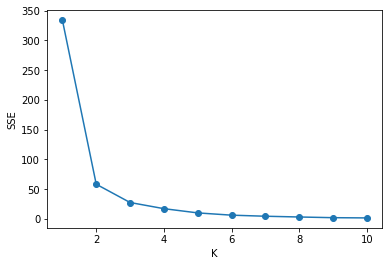

In [22]:
def elbow(x):
    sse = []
    
    for i in range(1, 11):
        km = KMeans(n_clusters=i, algorithm = 'auto', random_state = 100)
        km.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1, 11), sse, marker = 'o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(df_del)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)


Text(10.049999999999997, 0.5, 'v2')

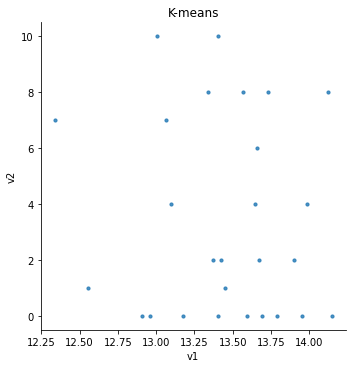

In [23]:
sb.lmplot('total', '카테고리', data = df_del, fit_reg = False, scatter_kws = {"s":10})

plt.title('K-means')
plt.xlabel('v1')
plt.ylabel('v2')